# Photosynthetic Rate

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('light_intensity.xlsx',sheet_name='Pn')

In [3]:
df

,Photon Flux [micromole/(m^2 s),Pn_Obs [mol/m^2 h]
0,581.306452,29.121344
1,161.696774,-11.770270
2,88.635484,-51.990430
3,0.396774,-44.733160


In [4]:
df.drop(['Pn_model','Unnamed: 3','Pmax',22],axis=1,inplace=True)

KeyError: "['Pn_model' 'Unnamed: 3' 'Pmax' 22] not found in axis"

In [5]:
df

,Photon Flux [micromole/(m^2 s),Pn_Obs [mol/m^2 h]
0,581.306452,29.121344
1,161.696774,-11.770270
2,88.635484,-51.990430
3,0.396774,-44.733160


In [6]:
df.to_excel("Pn1.xlsx")

In [7]:
# df['Pn_model'] was calculated using excel
# let's calculate it again using python and save the results to a new col
def Pn(E,Pmax,Ek,R):
    Pn = Pmax * np.tanh(E/Ek) - R
    return Pn

In [8]:
df.keys()

Index(['Photon Flux [micromole/(m^2 s)', 'Pn_Obs [mol/m^2 h]'], dtype='object')

In [107]:
# guess = [Pmax, Ek, R]
guess = [50,150,55]

n = len(df['Photon Flux [micromole/(m^2 s)'])
y = np.empty(n)
for i in range(n):
    y[i] = Pn(df['Photon Flux [micromole/(m^2 s)'][i],guess[0],guess[1],guess[2])

print(y)

[ -5.04302333 -15.37758758 -28.47275466 -54.86774231]


In [108]:
df['Pn_model_new'] = pd.DataFrame(y)
#df

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

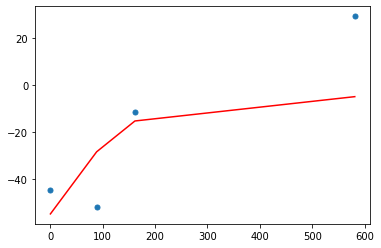

In [110]:
plt.plot(df['Photon Flux [micromole/(m^2 s)'],df['Pn_Obs [mol/m^2 h]'],'o',markersize=5)
plt.plot(df['Photon Flux [micromole/(m^2 s)'],y,'r')
 
plt.show()

In [119]:
from scipy.optimize import curve_fit
x = df['Photon Flux [micromole/(m^2 s)'].values
y = df['Pn_Obs [mol/m^2 h]'].values
c, cov = curve_fit(Pn,x,y,guess)

print('Pmax= ', c[0])
print('Ek= ', c[1])
print('R= ', c[2])

Pmax=  102.95354283448941
Ek=  544.8963155376159
R=  51.72184894441833


[ 29.43233709 -22.03688565 -35.12108542 -51.64688187]


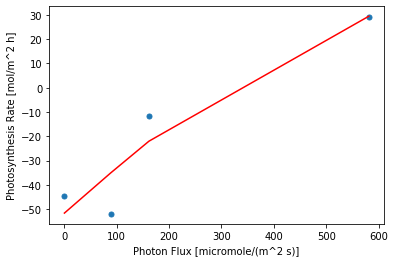

In [120]:
#use the above parameters
n = len(df['Photon Flux [micromole/(m^2 s)'])
y = np.empty(n)
for i in range(n):
    y[i] = Pn(df['Photon Flux [micromole/(m^2 s)'][i],c[0],c[1],c[2])

print(y)

fig = plt.figure()
plt.plot(df['Photon Flux [micromole/(m^2 s)'],df['Pn_Obs [mol/m^2 h]'],'o',markersize=5)
plt.plot(df['Photon Flux [micromole/(m^2 s)'],y,'r')
plt.xlabel('Photon Flux [micromole/(m^2 s)]')
plt.ylabel('Photosynthesis Rate [mol/m^2 h]')

plt.show()
fig.savefig('Pn')

# Calcification Rate

In [135]:
df_G = pd.read_excel('light_intensity.xlsx',sheet_name='G')

In [136]:
df_G

,Photon Flux [micromole/(m^2 s),G_Obs [mol/m^2 h]
0,581.306452,-0.000681
1,161.696774,-0.000847
2,88.635484,0.000863
3,0.396774,0.000043


In [137]:
df_G.to_excel('G.xlsx')

In [138]:
#Normalize the data
#convert G_Obs to mmol/m^2 h
df_G['G_Obs [mmol/m^2 h]'] = df_G['G_Obs [mol/m^2 h]'] *1e3

In [139]:
#df_G.drop(['G_Obs [mol/m^2 h]'],axis=1,inplace=True)
df_G

,Photon Flux [micromole/(m^2 s),G_Obs [mol/m^2 h],G_Obs [mmol/m^2 h]
0,581.306452,-0.000681,-0.681
1,161.696774,-0.000847,-0.847
2,88.635484,0.000863,0.863
3,0.396774,0.000043,0.043


In [176]:
def G(E,Gmax,D):
    G = (Gmax * np.tanh(E/544.89) - D) * 1000 #G is in mmol/(m^2 s)
    return G

In [177]:
# guess = [Pmax, Ek, R]
guess = [0.0009,0.0007]

n = len(df_G['Photon Flux [micromole/(m^2 s)'])
y = np.empty(n)
for i in range(n):
    y[i] = G(df_G['Photon Flux [micromole/(m^2 s)'][i],guess[0],guess[1])

print(y)

[ 0.00943844 -0.44049694 -0.55487768 -0.69934464]


In [254]:
df_G['G_model'] = pd.DataFrame(y)
df_G

,Photon Flux [micromole/(m^2 s),G_Obs [mol/m^2 h],G_Obs [mmol/m^2 h],G_model
0,581.306452,-0.000681,-0.681,-200.775177
1,161.696774,-0.000847,-0.847,-200.127913
2,88.635484,0.000863,0.863,-199.963368
3,0.396774,0.000043,0.043,-199.755542


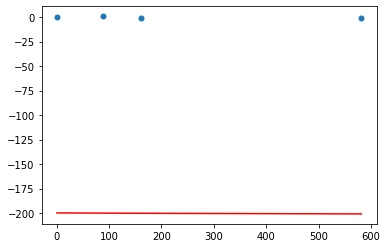

In [255]:
plt.plot(df_G['Photon Flux [micromole/(m^2 s)'],df_G['G_Obs [mmol/m^2 h]'],'o',markersize=5)
plt.plot(df_G['Photon Flux [micromole/(m^2 s)'],y,'r')
 
plt.show()

In [313]:
from scipy.optimize import curve_fit, leastsq
x = df_G['Photon Flux [micromole/(m^2 s)'].values
y = df_G['G_Obs [mmol/m^2 h]'].values
y = -y
c, cov = curve_fit(G,x,y,guess)
print('Gmax= ', c[0])
print('D= ', c[1])
print(cov)

Gmax=  0.0012947143992506965
D=  0.00024540082869918165
[[1.80041433e-06 5.57487889e-07]
 [5.57487889e-07 3.28801035e-07]]


In [314]:
def residual(p,x,y):
    if p[0] < 0:
        penalization = 10000
    else:
        penalization = 0
    return y-G(x,p[0],p[1])-penalization
c1, cov1 = leastsq(func=residual,x0 = (1.0,1.0), args = (x,y))
print('Gmax= ', c1[0])
print('D= ', c1[1])

Gmax=  0.0012947143872888644
D=  0.0002454008169407465


[ 0.77517714  0.12791289 -0.03663198 -0.24445805]


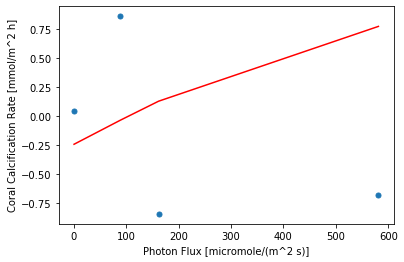

In [317]:
#use the above parameters
n = len(df_G['Photon Flux [micromole/(m^2 s)'])
y = np.empty(n)
for i in range(n):
    y[i] = G(df['Photon Flux [micromole/(m^2 s)'][i],c[0],c[1])

print(y)

fig = plt.figure()
plt.plot(df_G['Photon Flux [micromole/(m^2 s)'],df_G['G_Obs [mmol/m^2 h]'],'o',markersize=5)
plt.plot(df_G['Photon Flux [micromole/(m^2 s)'],y,'r')
 
plt.xlabel('Photon Flux [micromole/(m^2 s)]')
plt.ylabel('Coral Calcification Rate [mmol/m^2 h]')    
plt.show()
